In [ ]:
#ls /content/drive/MyDrive/ColabFiles/

In [ ]:
!pip -q install plotly --upgrade
!pip -q install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
base_census = pd.read_csv('/content/drive/MyDrive/ColabFiles/census.csv')
#base_census

In [ ]:
#opc
base_census 

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#Divisão entre previsores e classe
#exibir nome das colunas, opc
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
#separar os dados x para previsores e y para classes. iloc transforma em array numpy
X_census = base_census.iloc[:, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [ ]:
#y para classes. iloc cria array
y_census = base_census.iloc[:, 14].values
y_census
#base_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
#Tratamento de atributos categóricos [dividido em 2 etapas: labelEncoder e OneHotEncoder]
#1 parte: LabelEncoder [ tranforma strings em indices numericos]
from sklearn.preprocessing import LabelEncoder


In [ ]:
#exibe linha de registro do bd com diversos tipos de dados, numericos e strings.
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [ ]:
#criar um objeto p cada coluna q vai ser alterada [cjto de indices 1: masculino, 2: feminino]
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [ ]:
from pandas.core.internals import base
#substitue nas colunas, conforme a posição no bd
#função fit.transform p mudar de string p mnumero
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])
X_census[0]
#base_census

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [ ]:
# temmos um array só com numericos
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [ ]:
#parte 2: 
#OneHotEncoder: cria novas colunas com base nos indices
##tecnica p calcular pesos das colunas por codificacao dos elementos, [array 1,2,3: o 3 tem mais peso q o 1]. 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')


In [ ]:
#X_censusOriginal = X_census
X_census = onehotencoder_census.fit_transform(X_census.toarray())

AttributeError: ignored

In [ ]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [ ]:
X_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [ ]:

X_census.shape

(32561, 14)

In [ ]:
#Escalonamento dos valores
#deixar valores na mesma escala. p evitar o peso nas colunas[3+ importante 1]
#Standardization [padronização] ou normalização[normalization]
#Padronização é mais indicada qdo temos outliers[registros fora do padrão]

from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [ ]:
X_census[0]

array([ 0.03067056,  2.15057856, -1.06361075, -0.33543693,  1.13473876,
        0.92163395, -1.3178091 , -0.27780504,  0.39366753,  0.70307135,
        0.1484529 , -0.21665953, -0.03542945,  0.29156857])

In [ ]:
#Divisão das bases em treinamento e teste
from sklearn.model_selection import train_test_split

In [ ]:
#cria as variaveis p treinamento e teste. 
#x atributos previsores, y p classes. test-size 15% p testar,85% p treinar 
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size = 0.15, random_state = 0)


In [ ]:
#x atributos previsores, y p classes.
#exibe linhasxcol, #85% dados treinamento [sem oneHotEncode: 14 colunas, com OHE:116 col]
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 14), (27676,))

In [ ]:
#15% dados p teste,lin x col, [sem OHE: 14, com OHE: 116]
X_census_teste.shape, y_census_teste.shape

((4885, 14), (4885,))

In [ ]:
#Salvar as variáveis
import pickle

In [ ]:
#crio arquivo .pkl 
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste], f)

In [ ]:
#--arvore de decisão--#
#carregar a bib sklearn
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#import pickle

with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento

array([[-0.92239303,  1.46373585,  1.84273483, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [-0.84908045,  0.09005041,  0.19630465, ..., -0.21665953,
         3.20416118,  0.29156857],
       [ 1.42360965, -1.28363502,  2.83572992, ..., -0.21665953,
        -0.03542945,  0.29156857],
       ...,
       [-1.14233079,  0.09005041, -1.36867471, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [ 0.47054606, -1.28363502,  0.24712496, ..., -0.21665953,
         0.36951938,  0.29156857],
       [-0.99570562,  0.09005041, -0.02703374, ..., -0.21665953,
         0.61248868,  0.29156857]])

In [ ]:
y_census_treinamento

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

In [ ]:
#fit define a arvore dec. atrib previsores, classe e realiza o treinamento
arvore_census = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state = 42)
arvore_census.fit(X_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [ ]:
#testes
#Naïve Bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 14), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 14), (4885,))

In [ ]:
#previsão do alg
naive_census = GaussianNB()
naive_census.fit(X_census_treinamento, y_census_treinamento)
previsoes = naive_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [ ]:
#compara com bd orginal
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
#acuracia
#gerar a metricas p calcular a acuracia ou tx de acerto
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#calcula acuracia
accuracy_score(y_census_teste, previsoes) # não executar o escalonamento

0.8057318321392016

0.8057318321392016

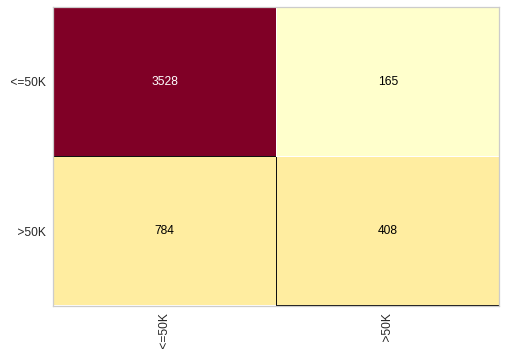

In [ ]:
#gerar  a matriz de confusão do naive bayes
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(naive_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.82      0.96      0.88      3693
        >50K       0.71      0.34      0.46      1192

    accuracy                           0.81      4885
   macro avg       0.77      0.65      0.67      4885
weighted avg       0.79      0.81      0.78      4885



In [ ]:
#=========#
#retorna a importancia de caada atributo depois dos calculos do maior ganho de inform
arvore_census.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.15068365,
       0.        , 0.        , 0.57323253, 0.        , 0.        ,
       0.27608381, 0.        , 0.        , 0.        ])

In [ ]:
#exibe as classes da arvore
arvore_census.classes_

array([' <=50K', ' >50K'], dtype=object)

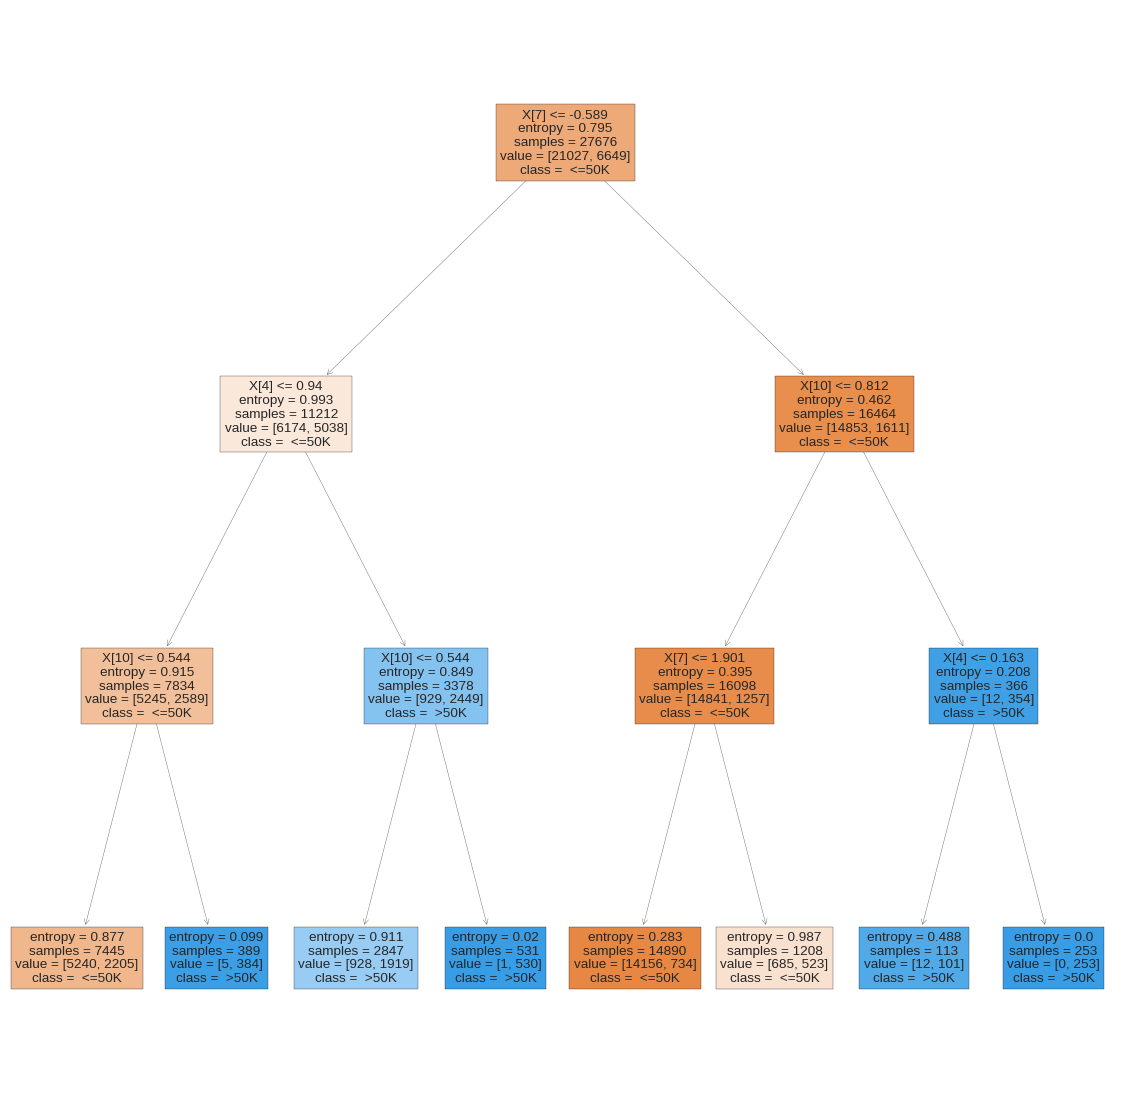

In [ ]:
#desenha a arvore
from sklearn import tree
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(arvore_census, class_names=arvore_census.classes_, filled=True);